In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from IPython.display import Image
import pydotplus

In [2]:
df = pd.read_csv('Decisiontreeproject.csv')

In [3]:
df.head()

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,11.89%,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,10.71%,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,13.57%,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,10.08%,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,14.26%,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 15 columns):
customer.id          9578 non-null object
credit.policy        9578 non-null object
purpose              9578 non-null object
int.rate             9578 non-null object
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
pub.rec              9578 non-null int64
inq.last.6mths       9578 non-null object
delinq.2yrs          9578 non-null object
paid.back.loan       9578 non-null object
dtypes: float64(5), int64(3), object(7)
memory usage: 1.1+ MB


In [5]:
df.drop('customer.id',axis=1,inplace=True)

In [6]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,Yes,debt_consolidation,11.89%,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,Yes,credit_card,10.71%,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,Yes,debt_consolidation,13.57%,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,Yes,debt_consolidation,10.08%,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,Yes,credit_card,14.26%,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes


In [7]:
X = df.drop('paid.back.loan',axis=1)

In [8]:
y = df['paid.back.loan']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [10]:
fully_paid = y_train.value_counts()
print(fully_paid)

Yes    5639
No     1065
Name: paid.back.loan, dtype: int64


<BarContainer object of 2 artists>

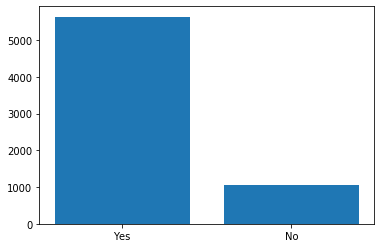

In [11]:
plt.bar(fully_paid.index,fully_paid)

In [12]:
X_train['int.rate'] = X_train['int.rate'].map(lambda x: str(x)[:-1])
X_train['int.rate'] = X_train['int.rate'].astype(float)/100

C:\Users\Mrunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mrunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
X_test['int.rate'] = X_test['int.rate'].map(lambda x: str(x)[:-1])
X_test['int.rate'] = X_test['int.rate'].astype(float)/100

C:\Users\Mrunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mrunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
num_df = X_train.select_dtypes(include='number')
cat_df = X_train.select_dtypes(include='object')

['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'pub.rec']


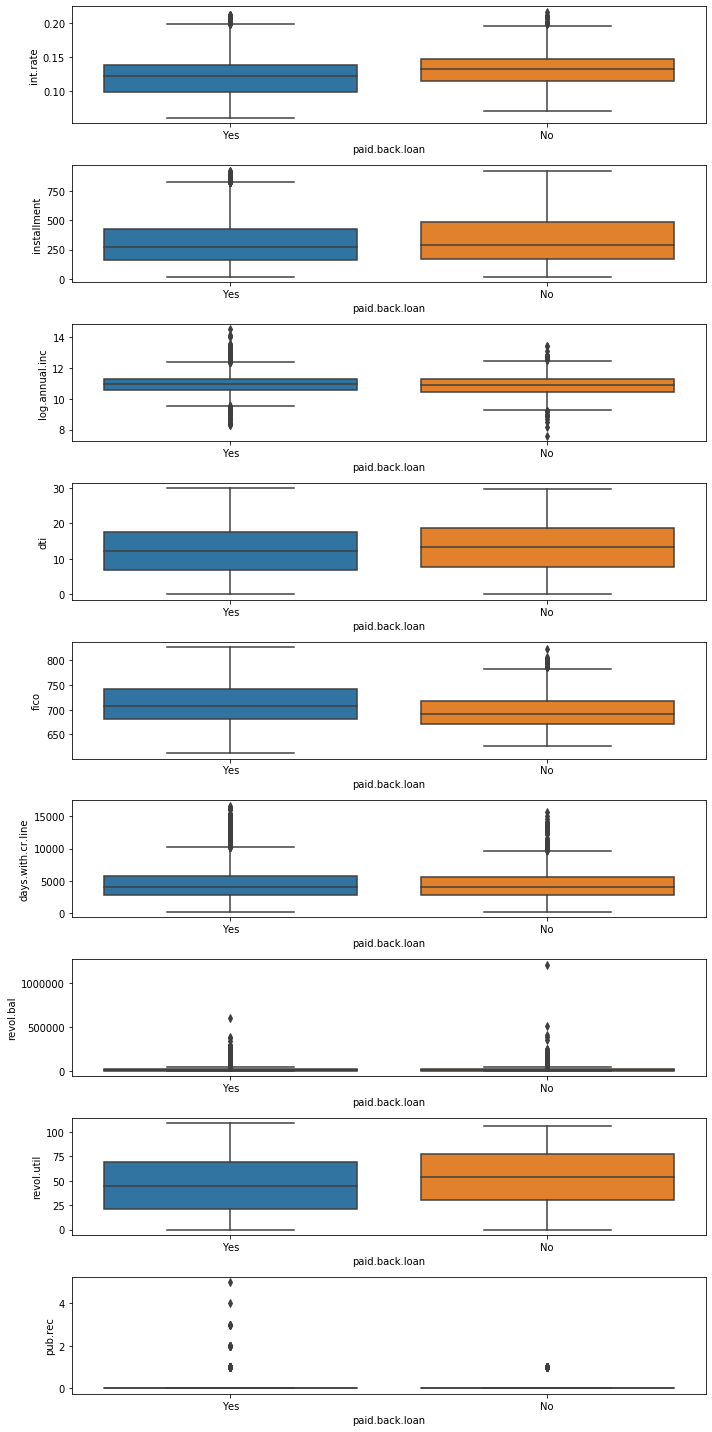

In [15]:
#Numerical feature visualization

cols = list(num_df.columns)
print(cols)

fig, axes = plt.subplots(9,1,figsize=(10,20))

for i in range(9):
    sns.boxplot(x=y_train, y=num_df[cols[i]], ax=axes[i])
    fig.tight_layout()
plt.show()

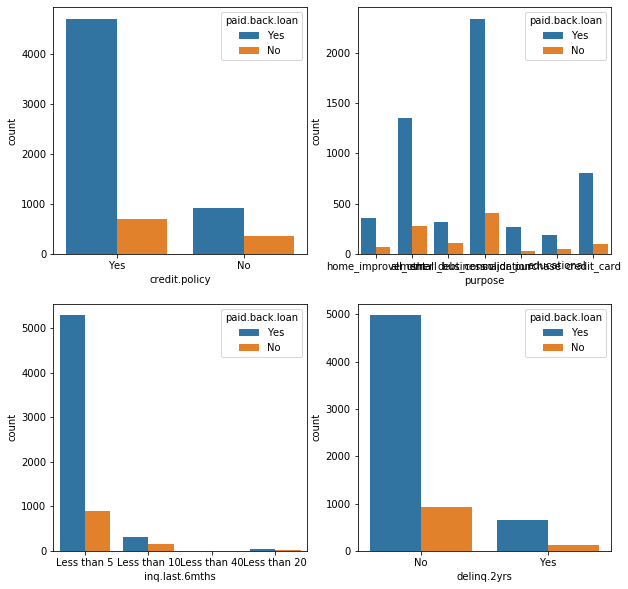

In [16]:
#Categorical feature visualization

cols1 = list(cat_df.columns)
fig,axes = plt.subplots(2,2,figsize=(10,10))

for i in range(2):
    i
    for j in range(2):
        sns.countplot(x=X_train[cols1[i*2+j]], hue=y_train, ax=axes[i,j])
        
plt.show()

In [17]:
#Importing header files
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Code starts here
for col in cat_df.columns:
    X_train[col].fillna('NA',inplace=True)
    
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])

    X_test[col].fillna('NA',inplace=True)
    X_test[col] = le.transform(X_test[col])

y_train.replace({'No':0,'Yes':1}, inplace=True)
y_test.replace({'No':0,'Yes':1}, inplace=True)

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)
acc = model.score(X_test,y_test)
print(acc)

C:\Users\Mrunal\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Mrunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Mrunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

0.7334725121781489


In [18]:
from sklearn.model_selection import GridSearchCV

#Parameter grid
parameter_grid = {'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,10)}

model_2 = DecisionTreeClassifier(random_state=0)
p_tree = GridSearchCV(estimator=model_2, param_grid=parameter_grid,cv=5)
p_tree.fit(X_train,y_train)

acc_2 = p_tree.score(X_test,y_test)
print(acc_2)

0.837160751565762


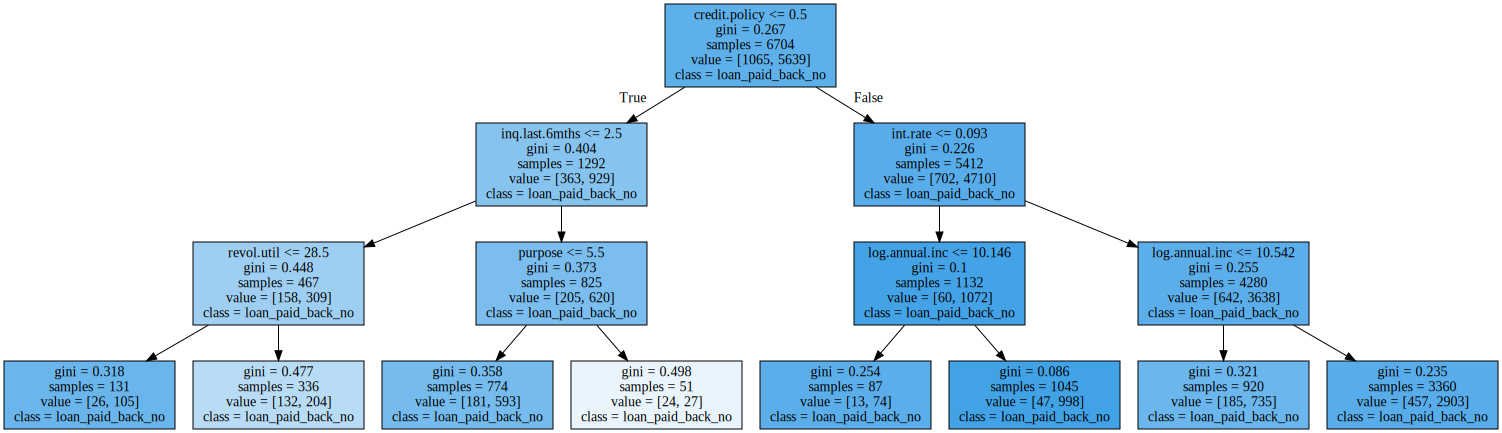

In [29]:
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from IPython.display import Image
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import graphviz

dot_data = tree.export_graphviz(decision_tree=p_tree.best_estimator_, out_file=None, feature_names=X.columns, filled = True, class_names=['loan_paid_back_yes','loan_paid_back_no'])

graph = graphviz.Source(dot_data)
graph

[Text(1162.5, 1981.875, 'credit.policy <= 0.5\ngini = 0.267\nsamples = 6704\nvalue = [1065, 5639]\nclass = loan_paid_back_no'),
 Text(581.25, 1415.625, 'inq.last.6mths <= 2.5\ngini = 0.404\nsamples = 1292\nvalue = [363, 929]\nclass = loan_paid_back_no'),
 Text(290.625, 849.375, 'revol.util <= 28.5\ngini = 0.448\nsamples = 467\nvalue = [158, 309]\nclass = loan_paid_back_no'),
 Text(145.3125, 283.125, 'gini = 0.318\nsamples = 131\nvalue = [26, 105]\nclass = loan_paid_back_no'),
 Text(435.9375, 283.125, 'gini = 0.477\nsamples = 336\nvalue = [132, 204]\nclass = loan_paid_back_no'),
 Text(871.875, 849.375, 'purpose <= 5.5\ngini = 0.373\nsamples = 825\nvalue = [205, 620]\nclass = loan_paid_back_no'),
 Text(726.5625, 283.125, 'gini = 0.358\nsamples = 774\nvalue = [181, 593]\nclass = loan_paid_back_no'),
 Text(1017.1875, 283.125, 'gini = 0.498\nsamples = 51\nvalue = [24, 27]\nclass = loan_paid_back_no'),
 Text(1743.75, 1415.625, 'int.rate <= 0.093\ngini = 0.226\nsamples = 5412\nvalue = [702, 4

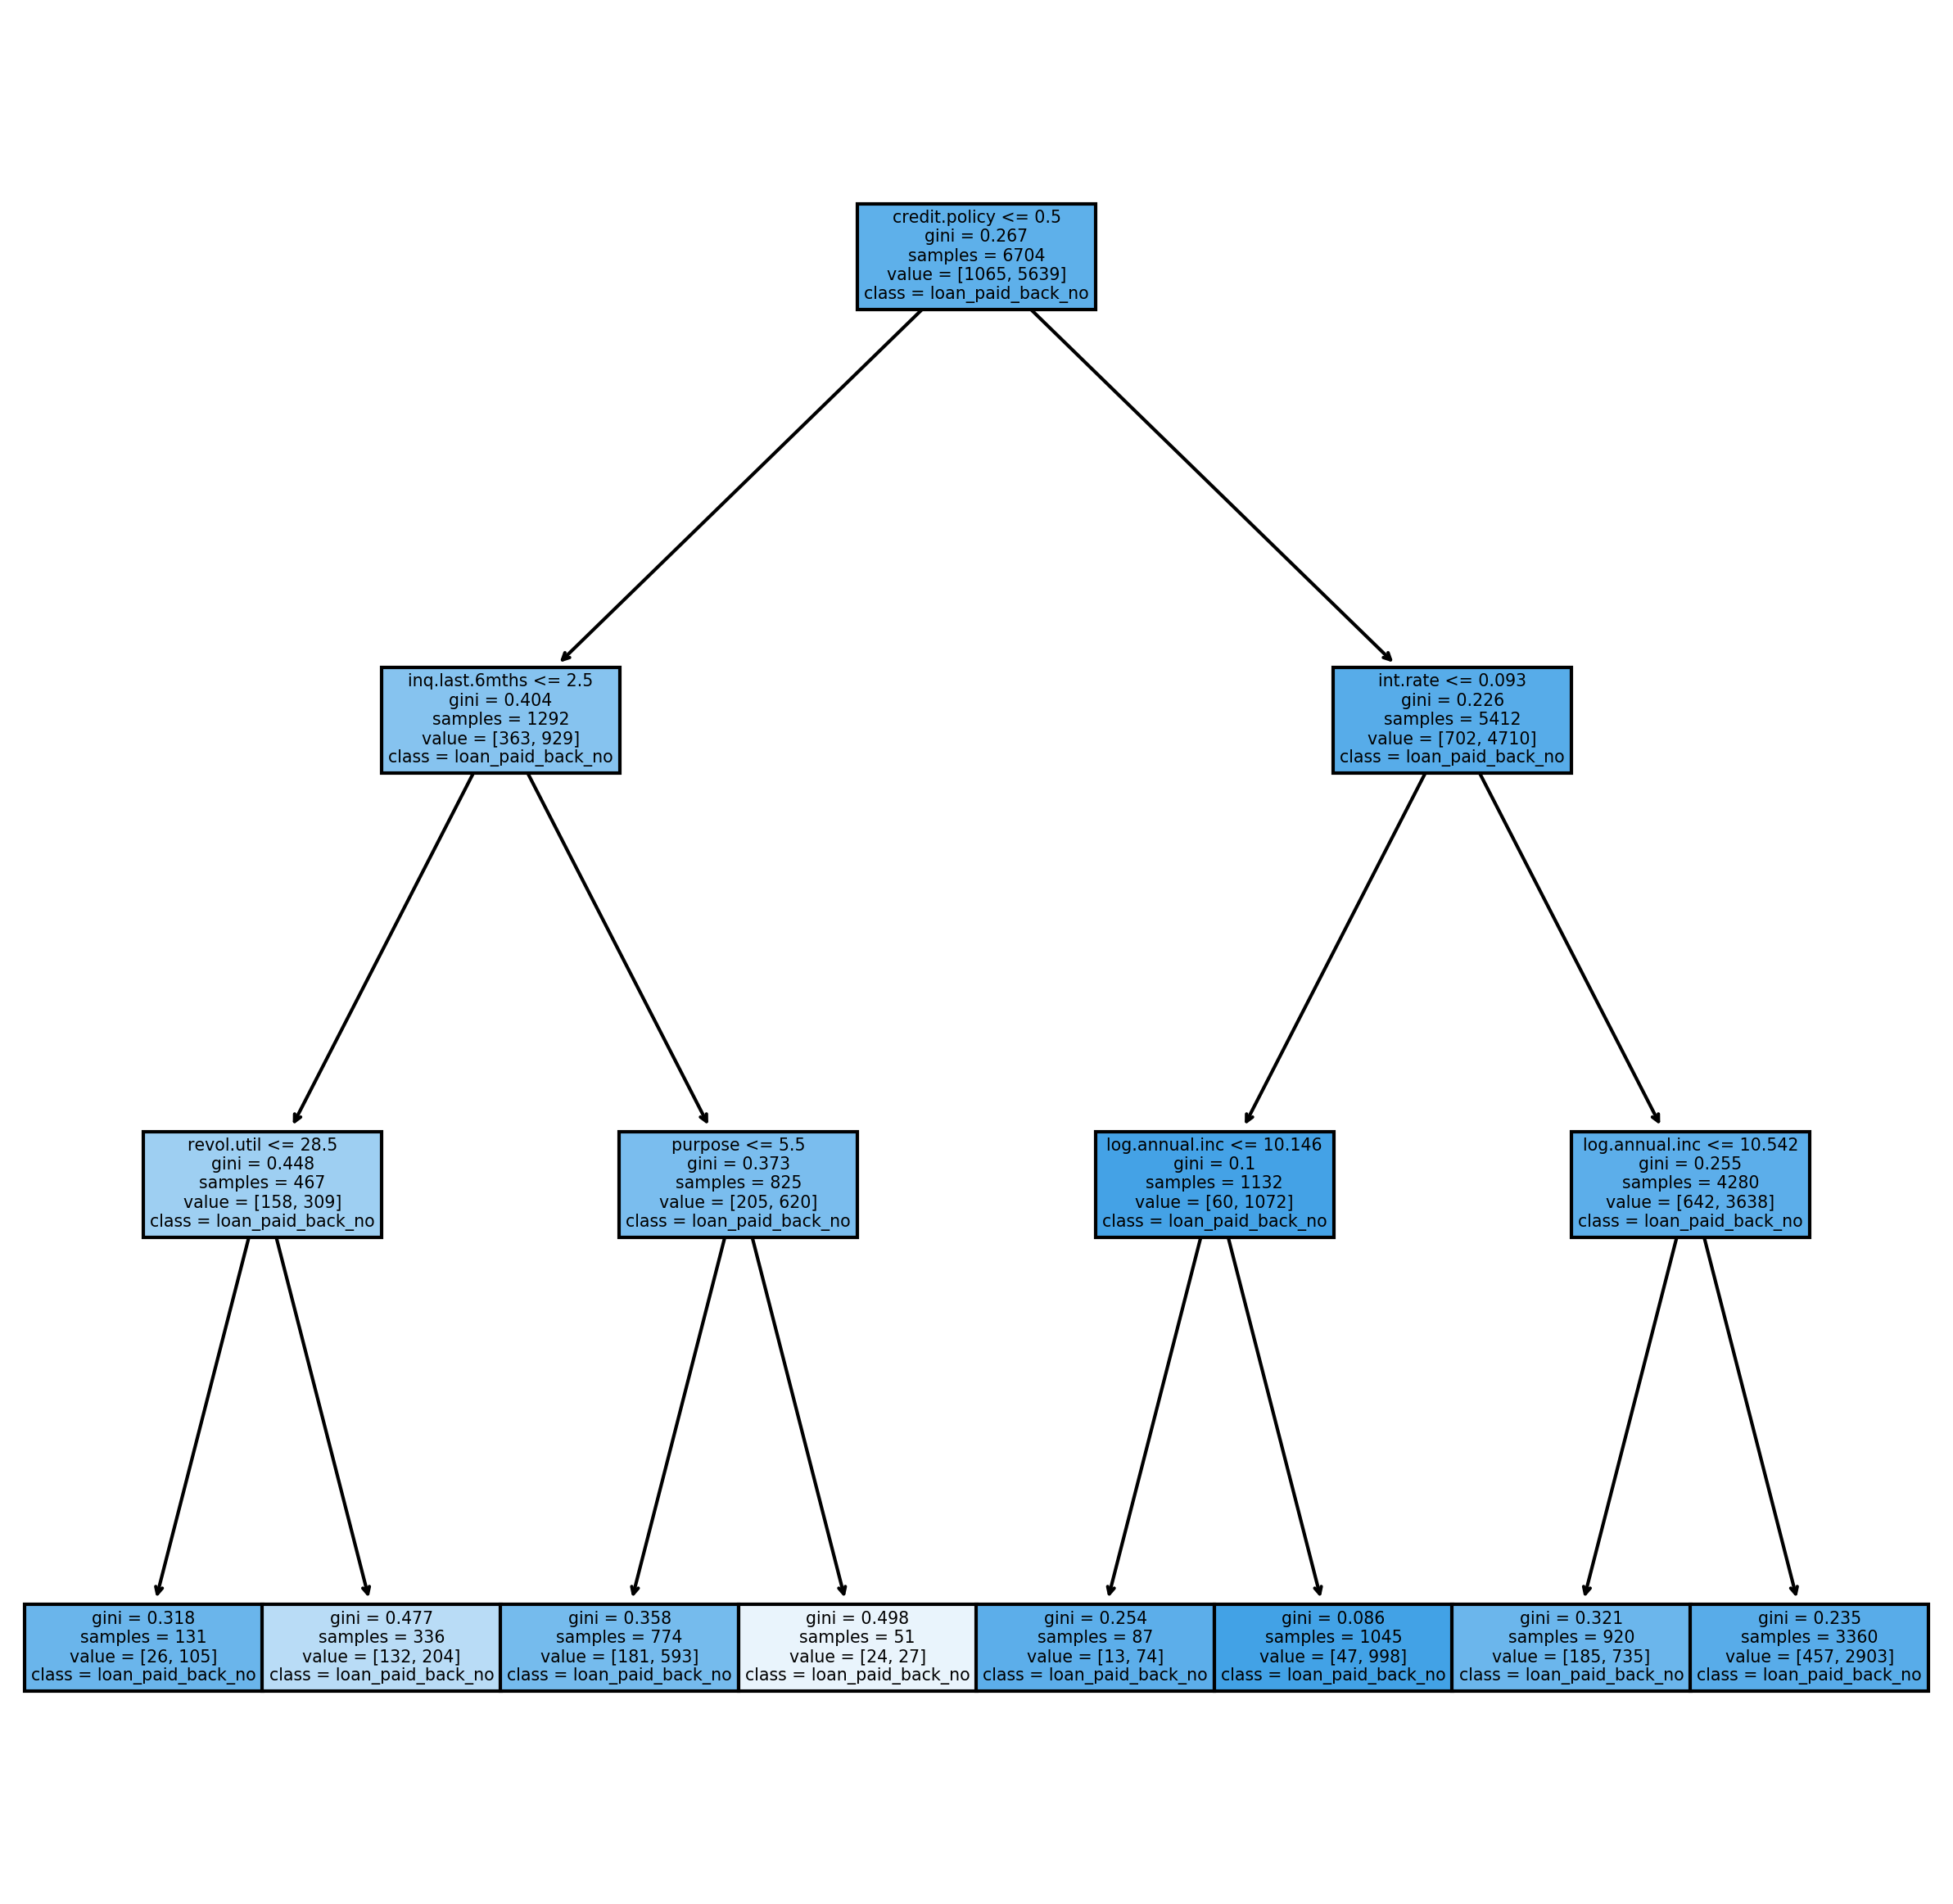

In [32]:
fn = list(X.columns)
cn = ['loan_paid_back_yes','loan_paid_back_no']

fig,axes = plt.subplots(1,1, figsize=(10,10), dpi=300)
tree.plot_tree(p_tree.best_estimator_, feature_names=fn, class_names=cn, filled=True)

[Text(167.4, 190.26, 'X[0] <= 0.5\ngini = 0.267\nsamples = 6704\nvalue = [1065, 5639]'),
 Text(83.7, 135.9, 'X[11] <= 2.5\ngini = 0.404\nsamples = 1292\nvalue = [363, 929]'),
 Text(41.85, 81.53999999999999, 'X[9] <= 28.5\ngini = 0.448\nsamples = 467\nvalue = [158, 309]'),
 Text(20.925, 27.180000000000007, 'gini = 0.318\nsamples = 131\nvalue = [26, 105]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.477\nsamples = 336\nvalue = [132, 204]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 5.5\ngini = 0.373\nsamples = 825\nvalue = [205, 620]'),
 Text(104.625, 27.180000000000007, 'gini = 0.358\nsamples = 774\nvalue = [181, 593]'),
 Text(146.475, 27.180000000000007, 'gini = 0.498\nsamples = 51\nvalue = [24, 27]'),
 Text(251.10000000000002, 135.9, 'X[2] <= 0.093\ngini = 0.226\nsamples = 5412\nvalue = [702, 4710]'),
 Text(209.25, 81.53999999999999, 'X[4] <= 10.146\ngini = 0.1\nsamples = 1132\nvalue = [60, 1072]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.254\n

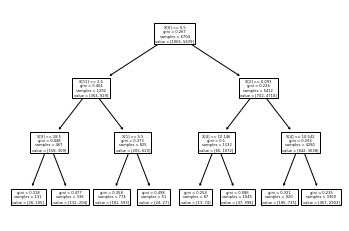

In [33]:
p_tree.best_estimator_.predict(X_test)
tree.plot_tree(p_tree.best_estimator_)